## Topic: Does online dating platform help speed up dating process?

### Data:       HCMST 2017 fresh sample for public sharing draft v1.1.csv
### Source:   Standford Social Science Collection
### Period:    July 13, 2017-August 1, 2017

In [135]:
#Rename variables in questionnaire with the help of 'HCMST_2017_fresh_Codeboodk_v1.1a.pdf'
'''
xlgb      LGB population or not
S1        are u married
S2        do you have a bf,gf,sexual/romantic partner
S3        have u ever had a bf,gf,sexual/romantic partner
Q5        is your partner same sex as you
Q32       did you choose an internet service to meet
Q17A      including current one, how many times have u been married
Q21A_Year in what year did you first meet
Q21B_Year in what year did you first have a romantic relationship
Q21D_Year in what year did you marry

'''

'\nxlgb      LGB population or not\nS1        are u married\nS2        do you have a bf,gf,sexual/romantic partner\nS3        have u ever had a bf,gf,sexual/romantic partner\nQ5        is your partner same sex as you\nQ32       did you choose an internet service to meet\nQ17A      including current one, how many times have u been married\nQ21A_Year in what year did you first meet\nQ21B_Year in what year did you first have a romantic relationship\nQ21D_Year in what year did you marry\n\n'

In [137]:
#Read csv file
import pandas as pd
data = pd.io.stata.read_stata('HCMST 2017 fresh sample for public sharing draft v1.1.dta')
data.to_csv('HCMST 2017 fresh sample for public sharing draft v1.1.csv')
raw=pd.read_csv('HCMST 2017 fresh sample for public sharing draft v1.1.csv')

In [138]:
#Extract useful columns
useful_columns=['xlgb','S1','S2','S3','Q5','Q32','Q17A','Q21A_Year','Q21B_Year','Q21D_Year']
df=raw[useful_columns]

In [139]:
#Renaming column heads
df.columns=["LGB","Married(Y/N)","Partner(Y/N)","Ever_have_partner(Y/N)","Same_sex_partner(Y/N)","Internet_service_used","No_of_marriage","Year_met","Year_together","Year_married"]


In [140]:
#Replacing variables on first 6 columns with more readable naming
clean_1=df.replace('gen pop','General').replace('LGB sample', 'LGB').replace('No, I am not Married','N').replace('Yes, I am Married','Y').replace('No, I am single, with no boyfriend, no girlfriend and no romantic or sexual partner','N').replace('Yes, I have a sexual partner (boyfriend or girlfriend)','Y').replace('I have a romantic partner who is not yet a sexual partner','Y').replace('No, we are an opposite-sex couple','N').replace('Yes, we are a same-sex couple','Y').replace('No, I did NOT meet [Partner Name] through the Internet','N').replace('Yes, an Internet dating or matchmaking site (like eHarmony or match.com)','Matchmaking site')


In [141]:
#Replacing variables of 'Internet_service_used' column with more readable and simplified naming
clean_2=clean_1.replace('Yes, an Internet dating or matchmaking site (like eHarmony or match.com)','Matchmaking site').replace('Yes, an app on my phone (like Tinder or Grindr)','Dating App').replace('Yes, an Internet chat room','Others').replace('Yes, an Internet classified advertising site (like Craigslist)','Others').replace('Yes, a social networking site (like Facebook or Myspace)','Social networking site').replace('Yes, a different kind of Internet service','Others').replace('Refused','Others')



In [142]:
#Replacing variables of 'No_of_marriage' column with simplified naming
clean_3=clean_2.replace({'Once (this is my first marriage)':'1','Twice':'2','Three times':'3','Four or more times':'4 or more'})

In [10]:
#Fill nan entries with zeros 
clean_3[['Year_met','Year_together','Year_married']]=clean_3[['Year_met','Year_together','Year_married']].fillna(0)

In [11]:
#Replace the rest of values with zeros
clean_3['Year_together'].replace('Others','0',inplace=True)
clean_3['Year_met'].replace('Others','0',inplace=True)
clean_3['Year_married'].replace('Others','0',inplace=True)

In [12]:
#Change data type to perform mathematical calculation
clean_3[['Year_together','Year_met','Year_married']]=clean_3[['Year_together','Year_met','Year_married']].astype('int')


In [13]:
#Filter data to get columns with reasonable values
clean_4=clean_3[clean_3['Year_together'] != 0]
clean_5=clean_4[clean_4['Year_met'] != 0]

In [14]:
#Creating new column of difference between 'Year_together' and 'Year_met'
clean_5['Met_to_together']=(clean_5['Year_together']-clean_5['Year_met'])
#Assign cleaned data to the variable 'for_plot'
for_plot=clean_5

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Plots

## 1. Distribution of respondent on different  platform

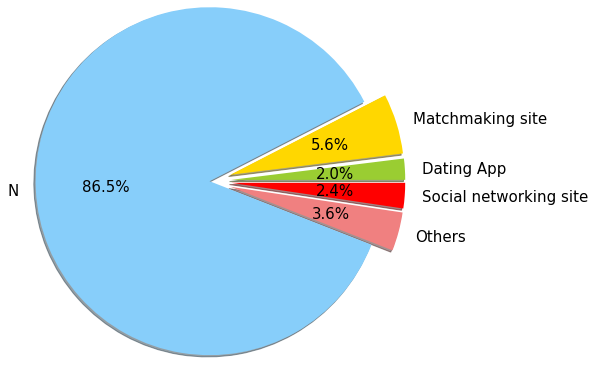

In [134]:
import matplotlib.pyplot as plt
#Gather data for plot
pie =for_plot.groupby(['Internet_service_used']).count()
pie_size=pie['Met_to_together']
#Set parameters for plot
plt.pie(pie_size,explode = (0.25, 0.25, 0, 0.25,0.25),colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red'],shadow=True,labels=pie.index,radius=2,autopct='%1.1f%%',textprops={'fontsize': 15})
plt.show()



## 2. Among respondnent who use online dating platform, the distribution of their marital  status

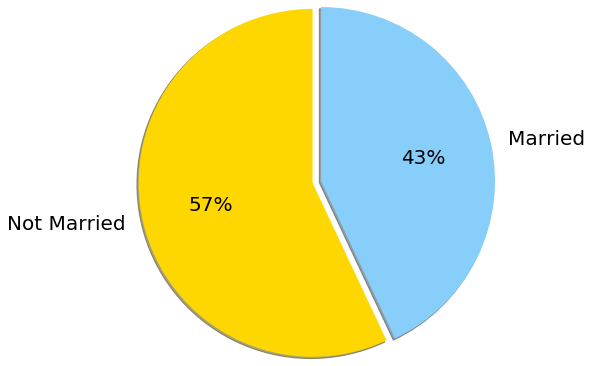

In [133]:
import matplotlib.pyplot as plt
#Gather data for plot
pie2=pct[pct['Internet_service_used']=='Y']
pie2=pie2.groupby(['Married(Y/N)']).count()
pie2plot=pie2['LGB'].astype(int)
#set parameters to plot
plt.pie(pie2plot,explode = (0,0.1),colors = ['gold', 'lightskyblue'],labels=['Not Married','Married'],shadow=True,radius=2,autopct='%1.0f%%',textprops={'fontsize': 20},startangle=90)
plt.show()


In [145]:
#Modify data for better bar chart presentation
pct=clean_5
pct=pct.replace('Matchmaking site','Y').replace('Dating App','Y').replace('Others','Y').replace('Social networking site','Y').replace('Refused','Others')
c=pct.groupby(['Internet_service_used']).mean()
#Calculating percentage change
c['Met_to_together'].pct_change()


Internet_service_used
N        NaN
Y   -0.61276
Name: Met_to_together, dtype: float64

## Manipulate data for bar chart

In [32]:
my=pct[pct['Year_married'] != 0]
my['Year_marriage']=(my['Year_married']-my['Year_met'])
my=my.groupby(['Internet_service_used']).mean()
my

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Ever_have_partner(Y/N),Year_met,Year_together,Year_married,Met_to_together,Year_marriage
Internet_service_used,,,,,,
N,NaN,1986.991808,1988.553250,1992.118514,1.561442,5.126707
Y,NaN,2005.765823,2006.468354,2009.626582,0.702532,3.860759


## 3. What is the difference in years to get into a relationship between those who use and those who don't use online dating platform

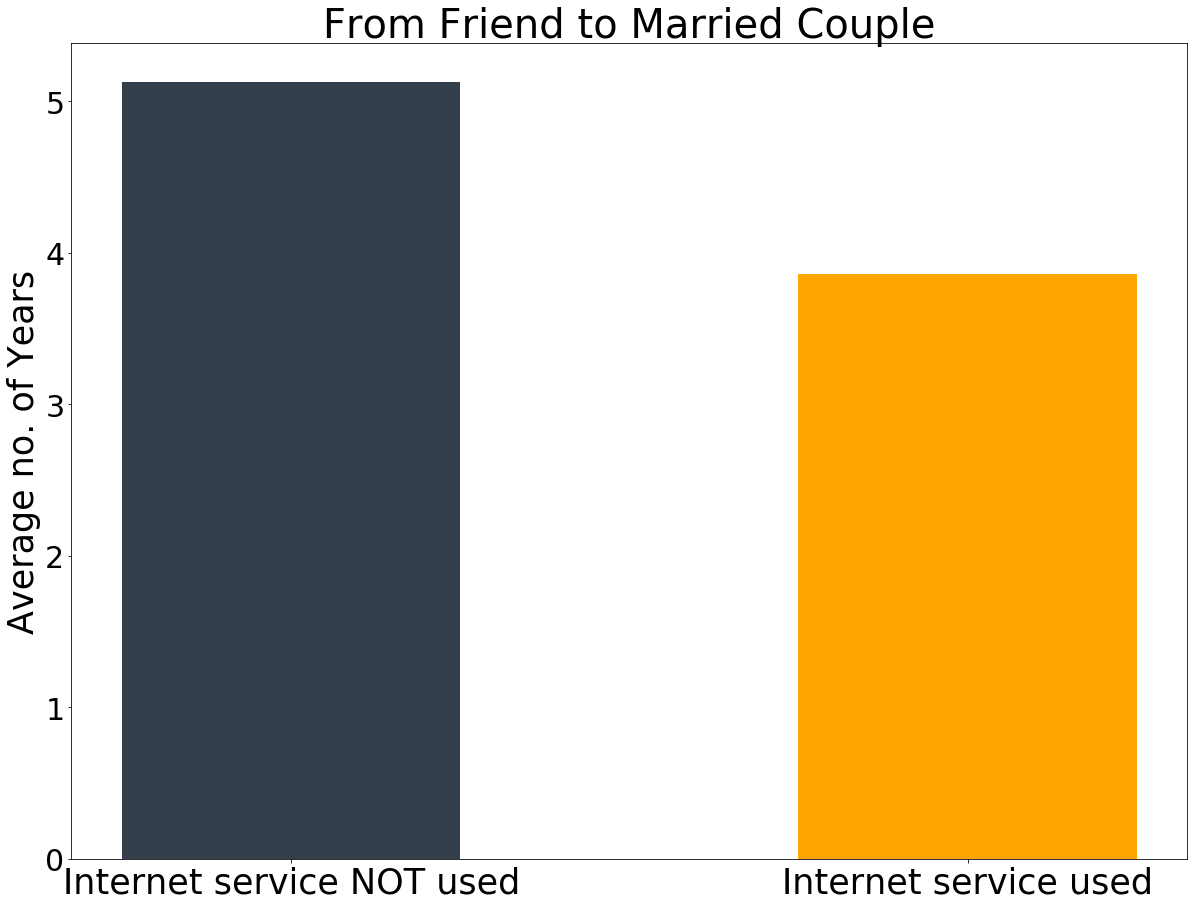

In [62]:
import numpy as np
import matplotlib.pyplot as plt
da2=my['Year_marriage']

fig=plt.figure(figsize=(20,15))
#Set up bar chart plot parameters
plt.bar([0.6,0.8], da2, color = ['#333F4B','orange'], width = 0.1)
#Give it a title
plt.title('From Friend to Married Couple', fontsize=40)
#Format y label
plt.ylabel('Average no. of Years',fontsize=35)
#Format xticks and yticks
plt.yticks(fontsize=30)
plt.xticks([0.6,0.8],('Internet service NOT used','Internet service used'),fontsize = 35)


plt.show()

## 4. What is the difference in years to get married between those who use and those who don't use online dating platform

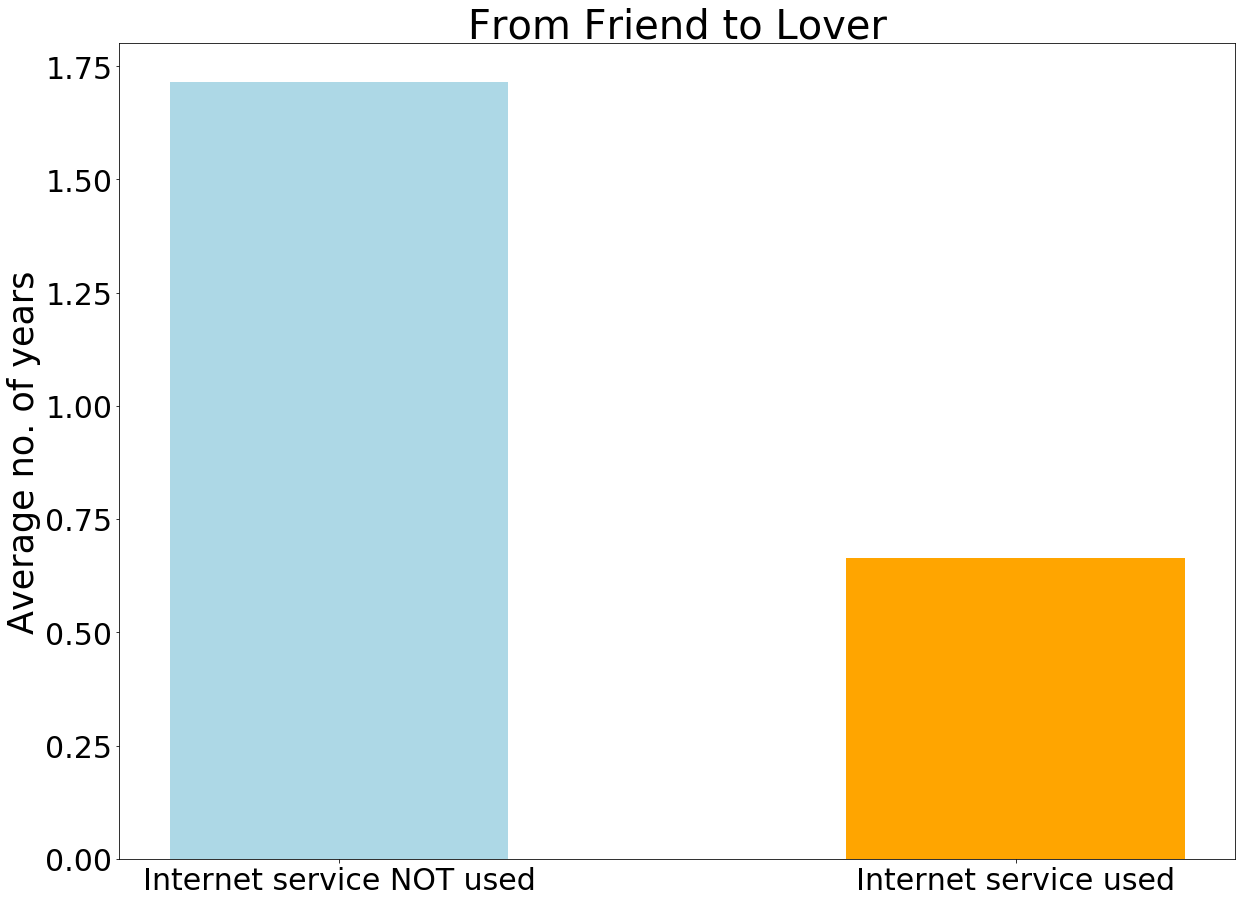

In [54]:
import numpy as np
import matplotlib.pyplot as plt
da1= c['Met_to_together']

fig=plt.figure(figsize=(20,15))
#Set up bar chart plot parameters
plt.bar([0.6,0.8], da1, color = ['lightblue','orange'], width = 0.1)
#Give it a title
plt.title('From Friend to Lover', fontsize=40)
#Format y label
plt.ylabel('Average no. of years',fontsize=35)
#Format xticks and yticks
plt.yticks(fontsize=30)
plt.xticks([0.6,0.8],('Internet service NOT used','Internet service used'),fontsize = 30)

plt.show()

## Create 2 tables from which bar chart is plotted

In [56]:
for_plot1= for_plot.groupby(['Internet_service_used']).mean().round(2)
for_plot1=for_plot1.rename(index={'N':'No online service used'})
for_plot1

,Year_met,Year_together,Year_married,Met_to_together
Internet_service_used,,,,
Dating App,2014.81,2014.96,373.26,0.15
Matchmaking site,2010.46,2010.90,913.71,0.44
No online service used,1991.45,1993.16,1530.66,1.71
Others,2005.47,2006.52,932.30,1.04
Social networking site,2009.68,2010.74,990.08,1.06


In [58]:
#Filter for couples who met before year 2009
for_plot_2009=for_plot[for_plot['Year_met'] < 2009]
#Select data for bar chart
for_plot_2009=for_plot_2009.groupby(['Internet_service_used']).mean().round(2)
for_plot_2009=for_plot_2009.rename(index={'N':'No online service used'})
#Add row 'Dating App' with value '0.0' as the row is missing after performing groupby
row=pd.Series({'Met_to_together':0.0}, name='Dating App')
for_plot_2009=for_plot_2009.append(row)
for_plot_2009.sort_index()

,Year_met,Year_together,Year_married,Met_to_together
Internet_service_used,,,,
Dating App,NaN,NaN,NaN,0.00
Matchmaking site,2003.25,2004.33,1588.90,1.08
No online service used,1986.69,1988.64,1745.57,1.95
Others,1999.80,2001.08,1393.80,1.29
Social networking site,2004.50,2006.62,1545.85,2.12


## 5. Comparison of time taken for respondents to be in a relationship across platforms before and after year 2009 

([<matplotlib.axis.XTick at 0x1225774e0>,
 <a list of 5 Text xticklabel objects>)

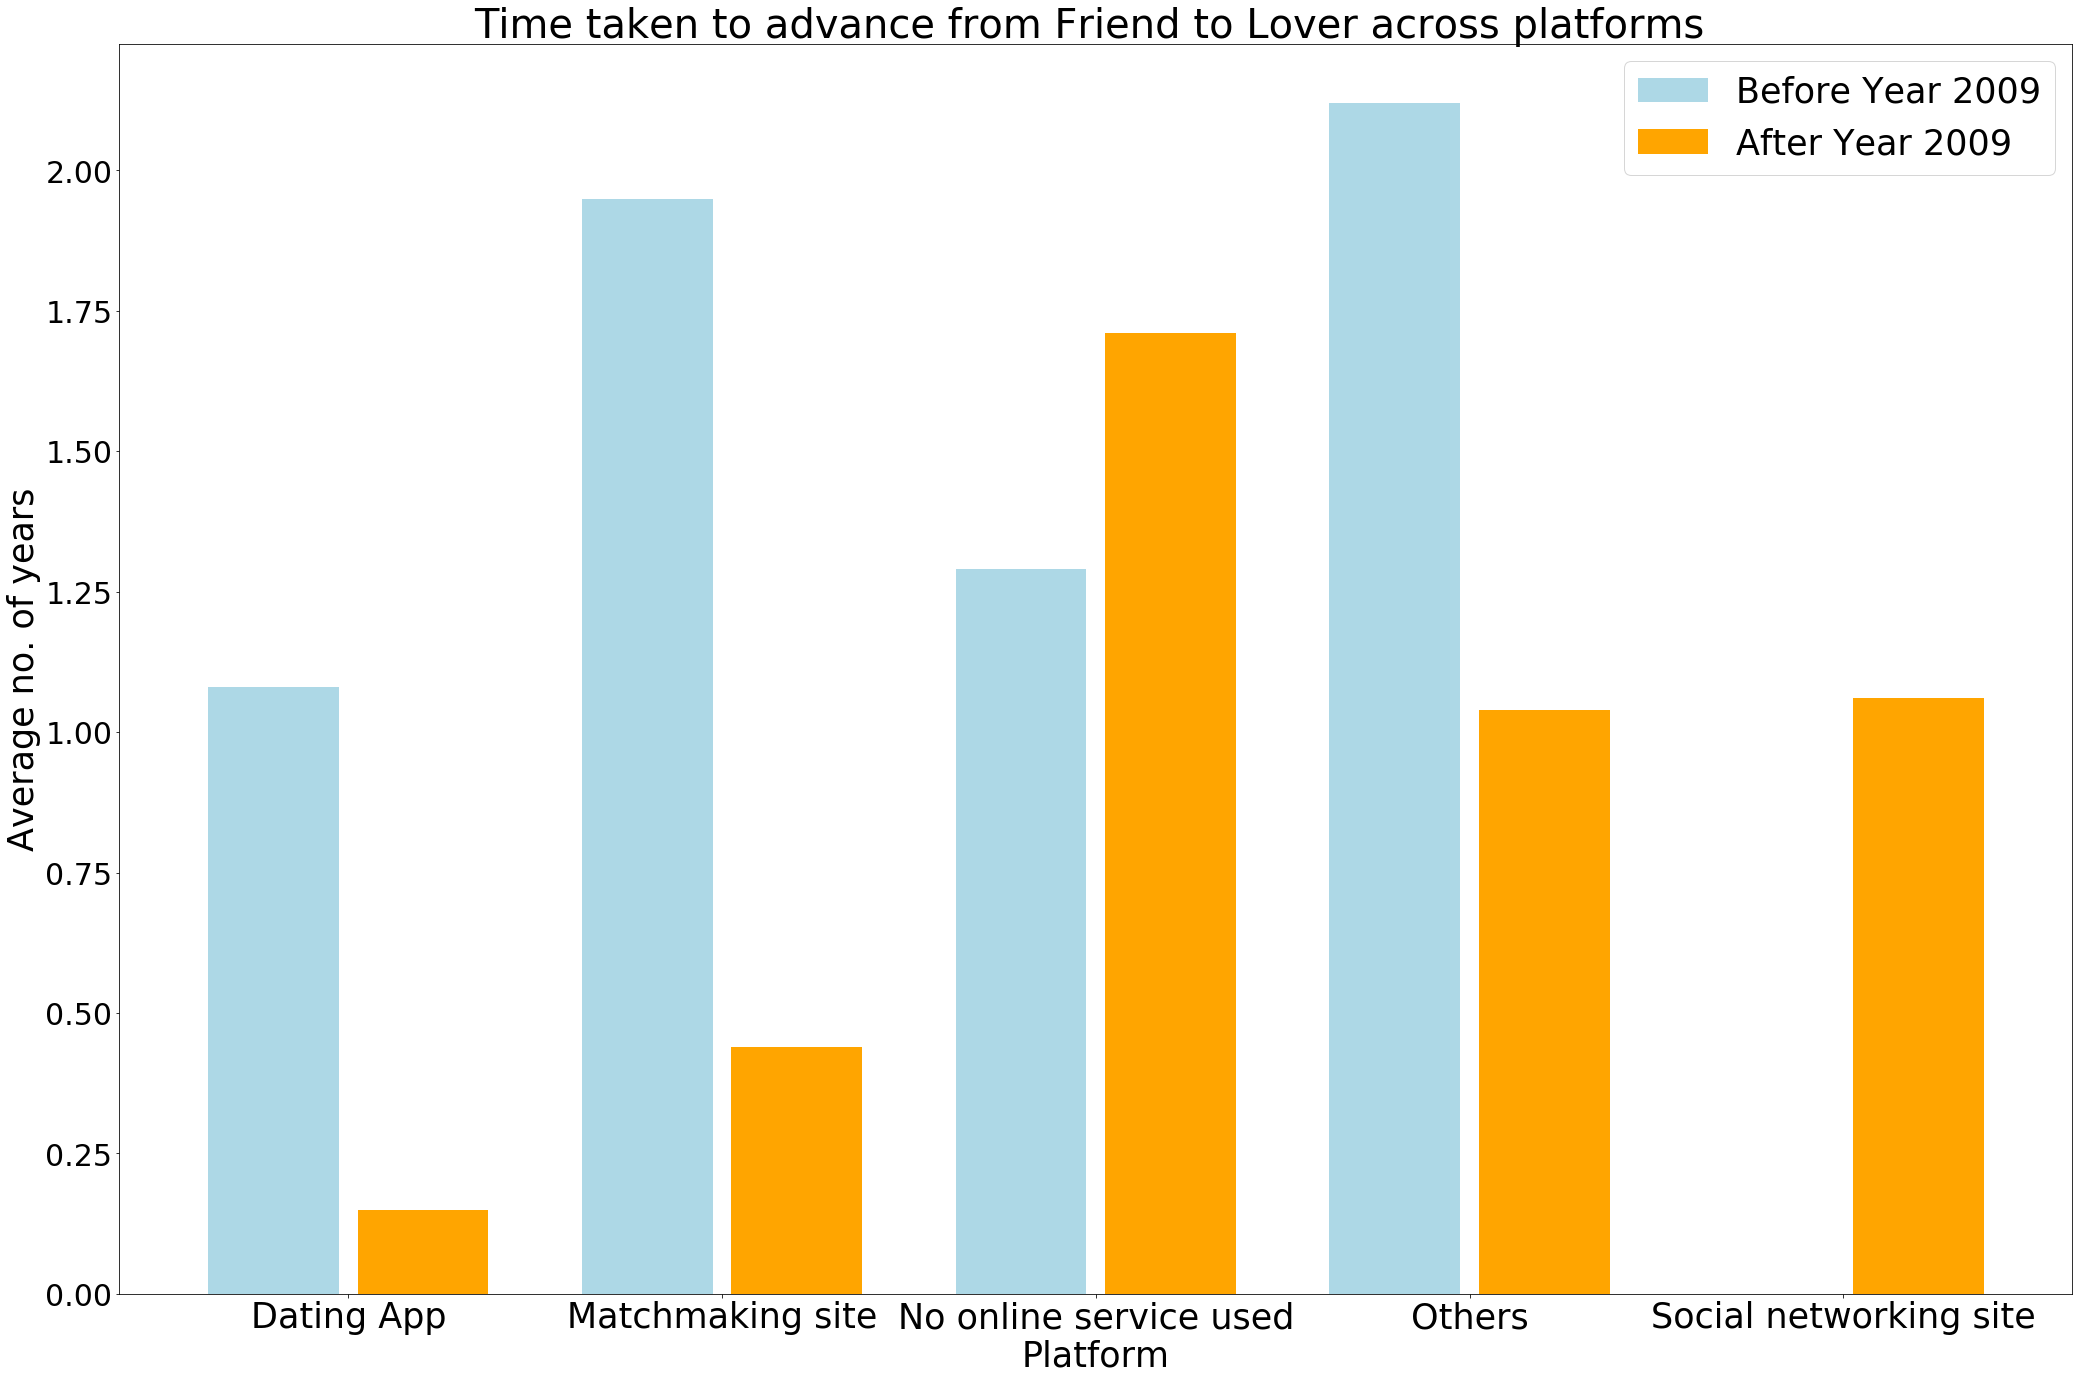

In [63]:
import matplotlib.pyplot as plt
import numpy as np

data = [for_plot1['Met_to_together'],for_plot_2009['Met_to_together']]
X = np.arange(5)
cat=for_plot1.index
fig=plt.figure(figsize=(35,23))

plt.bar(X + 0.00, data[1], color = 'lightblue', width = 0.35, tick_label= 'before')
plt.bar(X + 0.4, data[0], color = 'orange', width = 0.35, tick_label= 'after')
plt.legend(('Before Year 2009','After Year 2009'), fontsize=35)
plt.title('Time taken to advance from Friend to Lover across platforms ', fontsize=40)

plt.xlabel('Platform',fontsize=35)
plt.ylabel('Average no. of years',fontsize=35)
plt.yticks(fontsize=30)

plt.xticks(X + 0.2, cat, fontsize = 35)
